In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import glob

🚁 QUADCOPTER SENSOR DATA LINEAR REGRESSION ANALYSIS

📂 Default data path: D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs

📁 Available CSV Files:
--------------------------------------------------
 1. all_sensor_data_20250519_174550.csv (4178.0 KB)
 2. all_sensor_data_20250523_032200.csv (7144.9 KB)
 3. all_sensor_data_20250523_040556.csv (7188.5 KB)
 4. all_sensor_data_20250523_041548.csv (7124.1 KB)
 5. all_sensor_data_20250523_041941.csv (17913.3 KB)
 6. all_sensor_data_20250526_123717.csv (14631.1 KB)
 7. all_sensor_data_20250526_170501.csv (16288.7 KB)
 8. all_sensor_data_20250527_072440.csv (15449.9 KB)
 9. baro_data_20250519_174550.csv  (581.7 KB)
10. gps_data_20250519_174550.csv   (975.7 KB)
11. ground_truth_data_20250519_174550.csv (6898.6 KB)
12. ground_truth_data_20250523_032200.csv (6898.6 KB)
13. ground_truth_data_20250523_040556.csv (6898.6 KB)
14. ground_truth_data_20250523_041548.csv (6839.3 KB)
15. ground_truth_data_20250523_041941.csv 

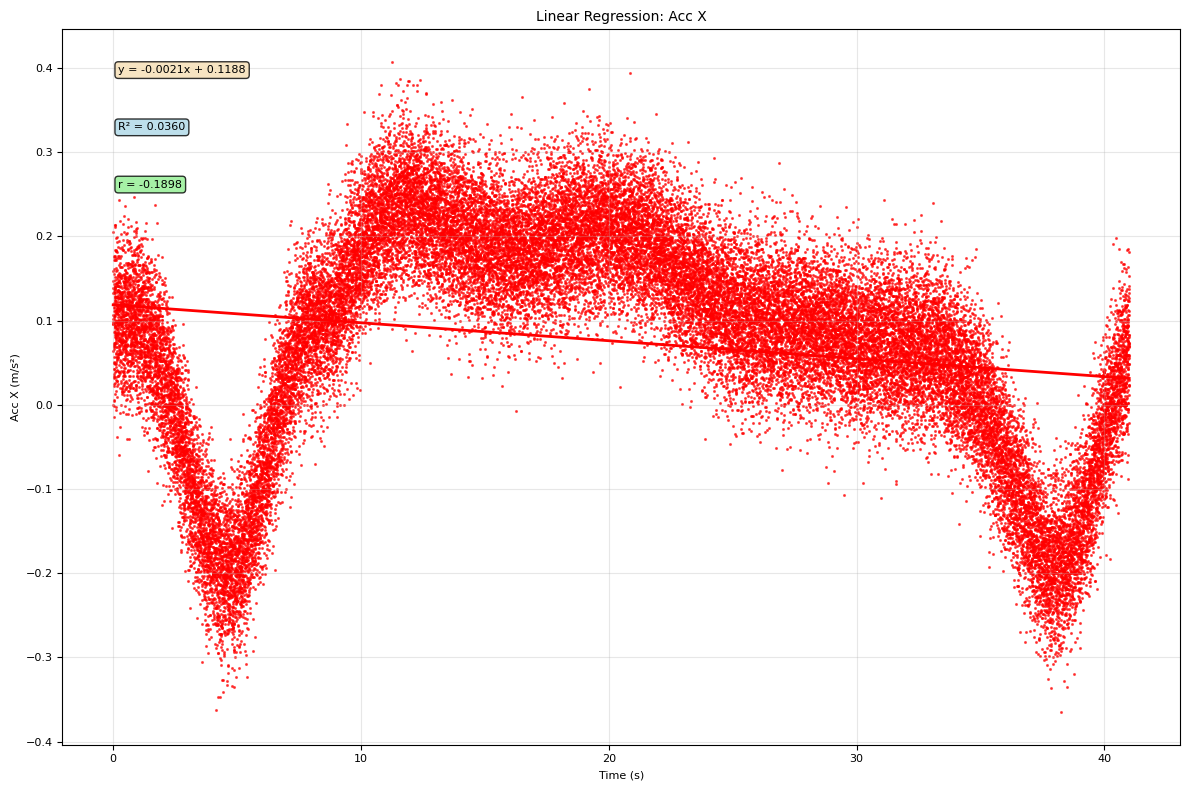

Plotting 2/25: acc_y


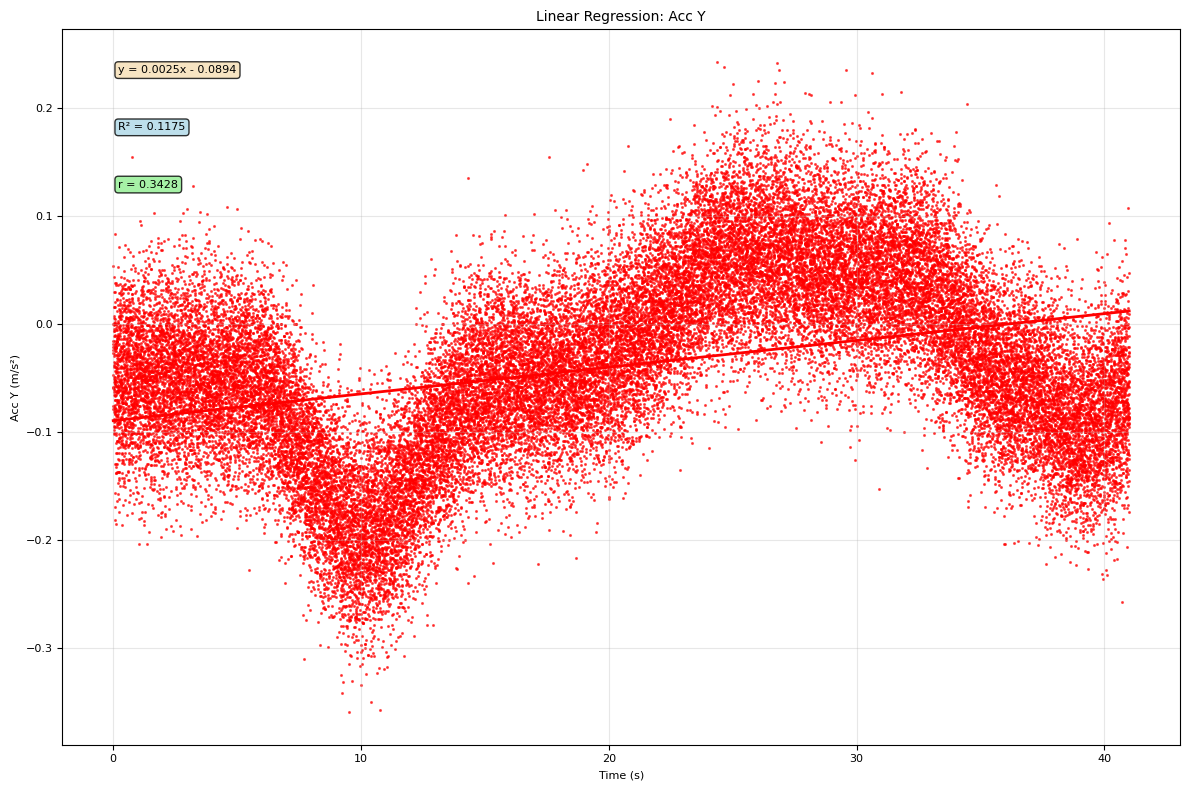

Plotting 3/25: acc_z


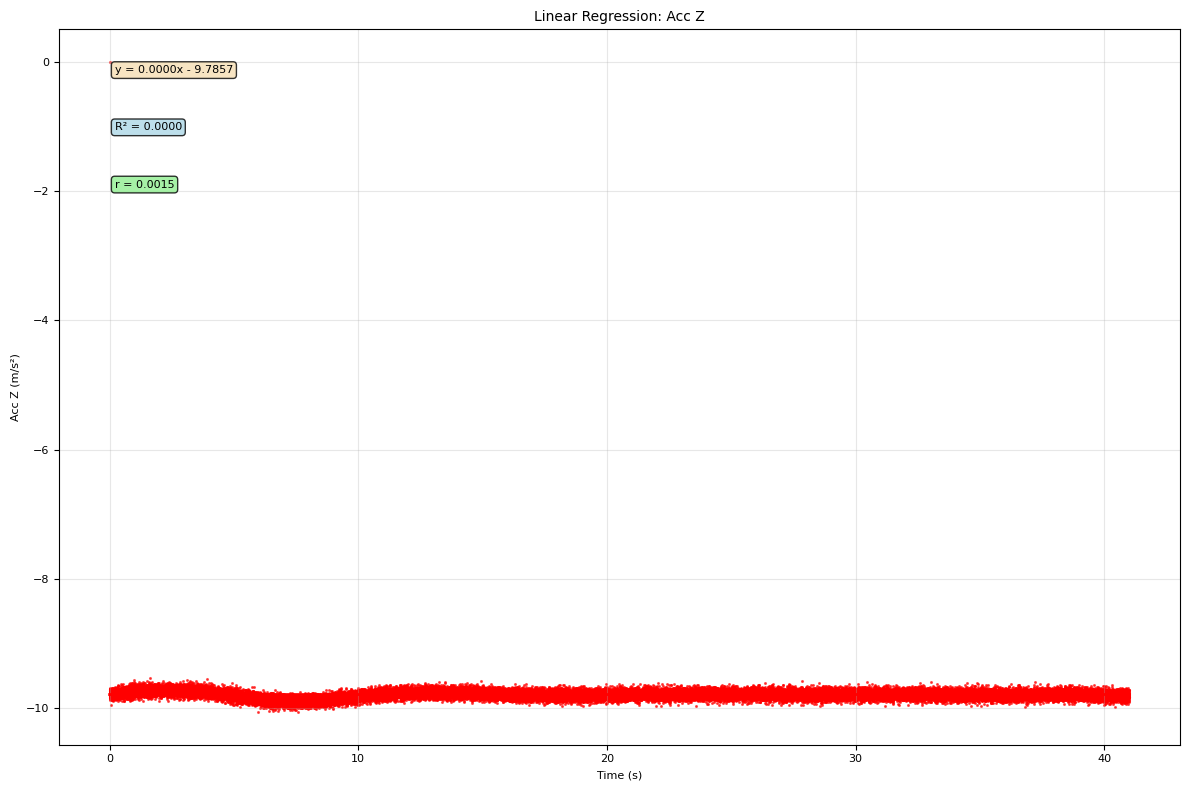

Plotting 4/25: gyro_x


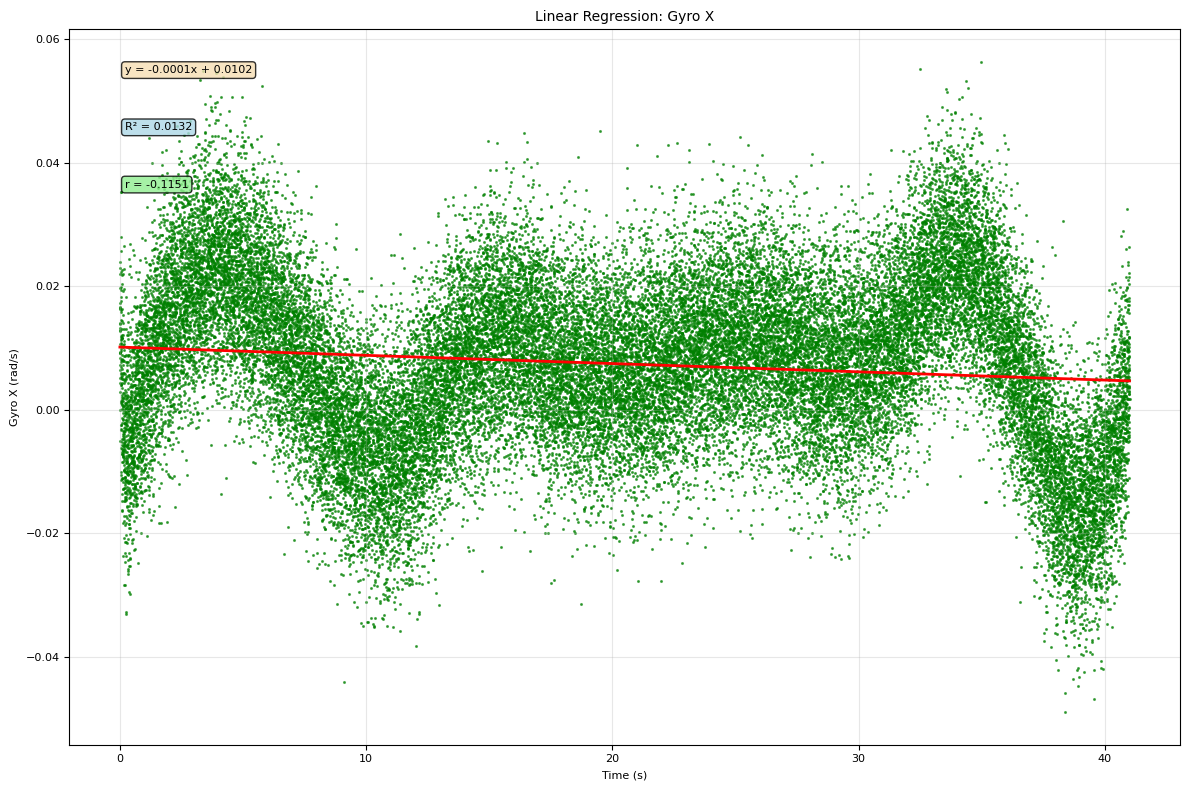

Plotting 5/25: gyro_y


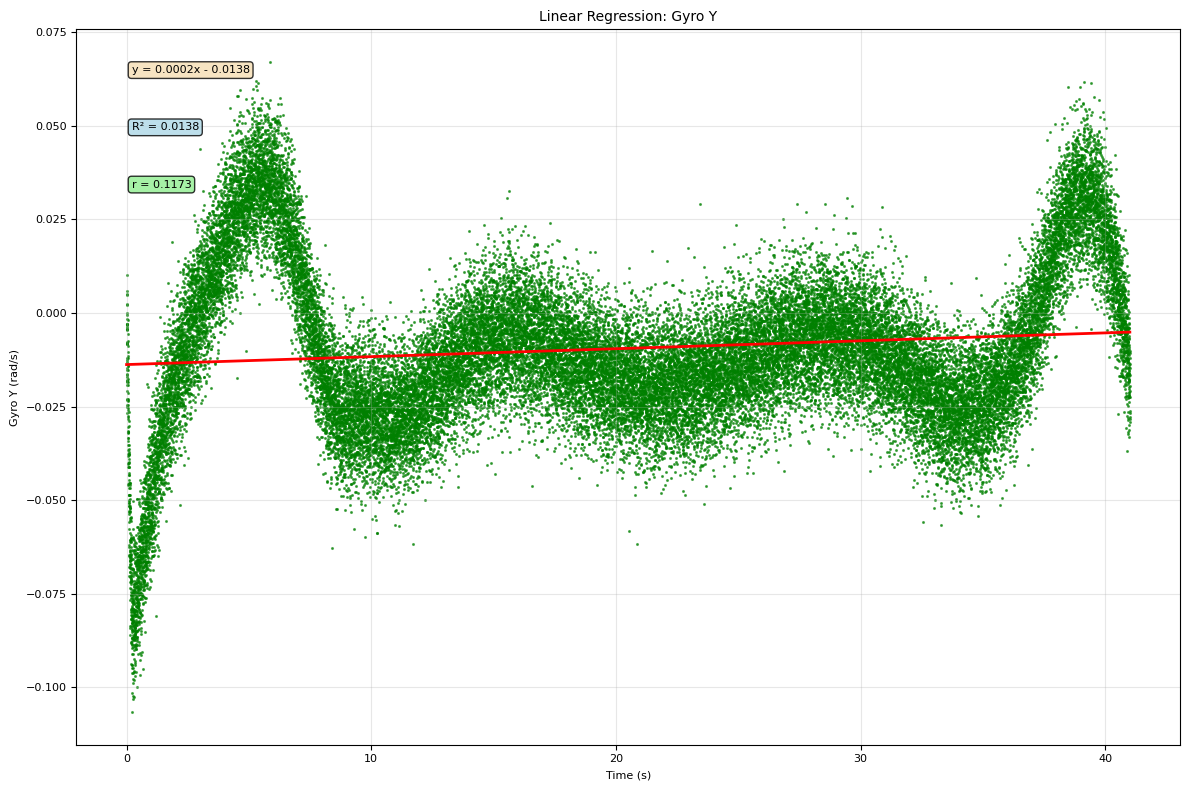

Plotting 6/25: gyro_z


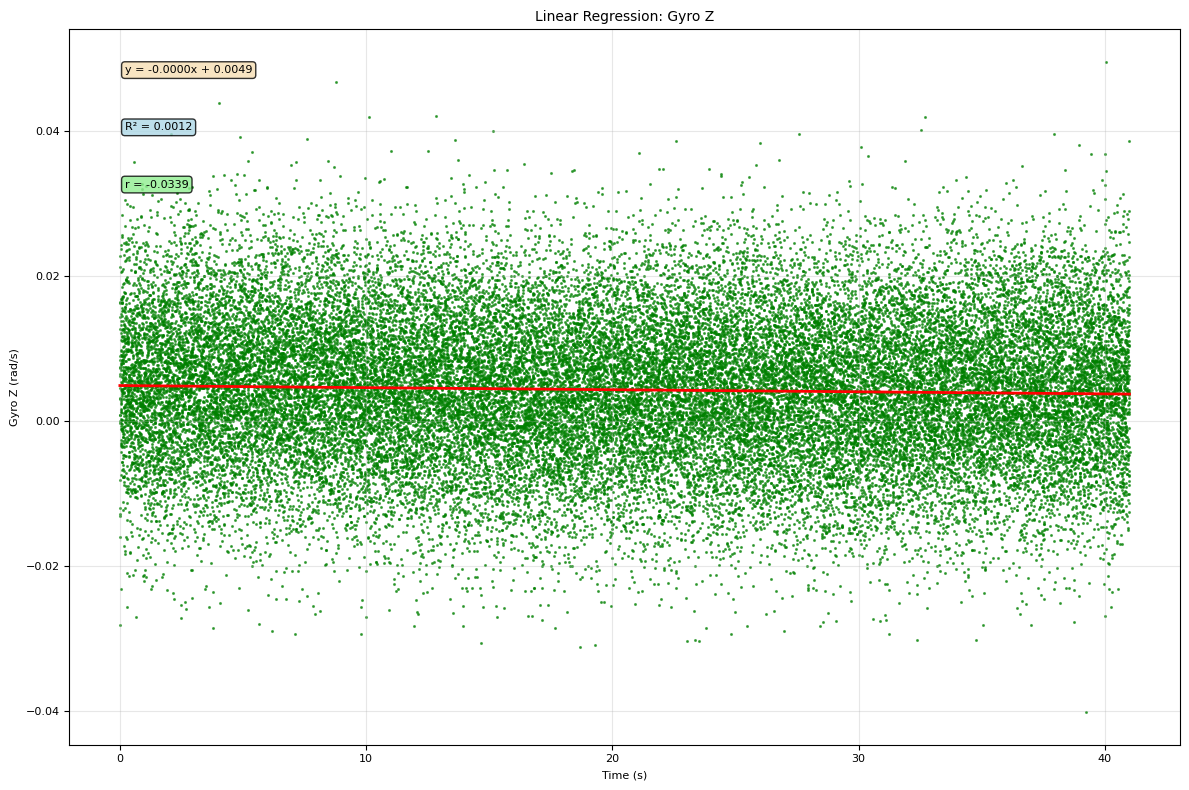

Plotting 7/25: gps_pos_x


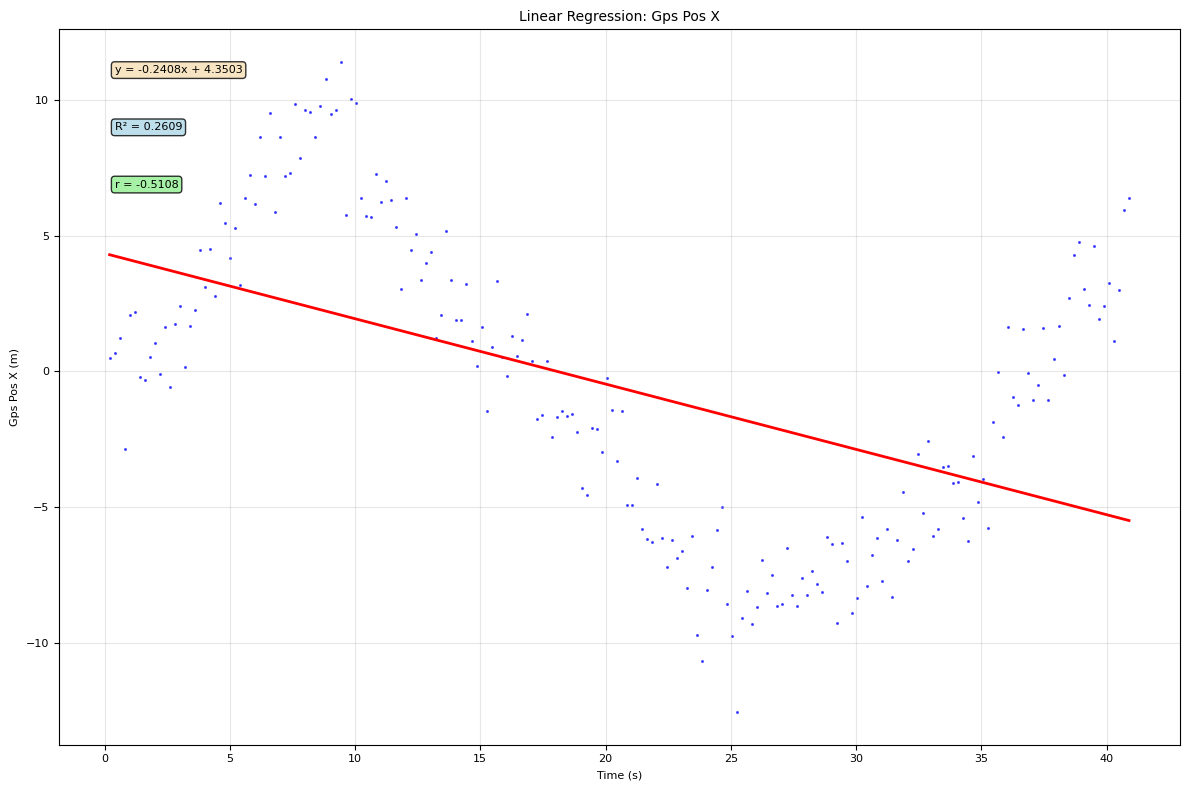

Plotting 8/25: gps_pos_y


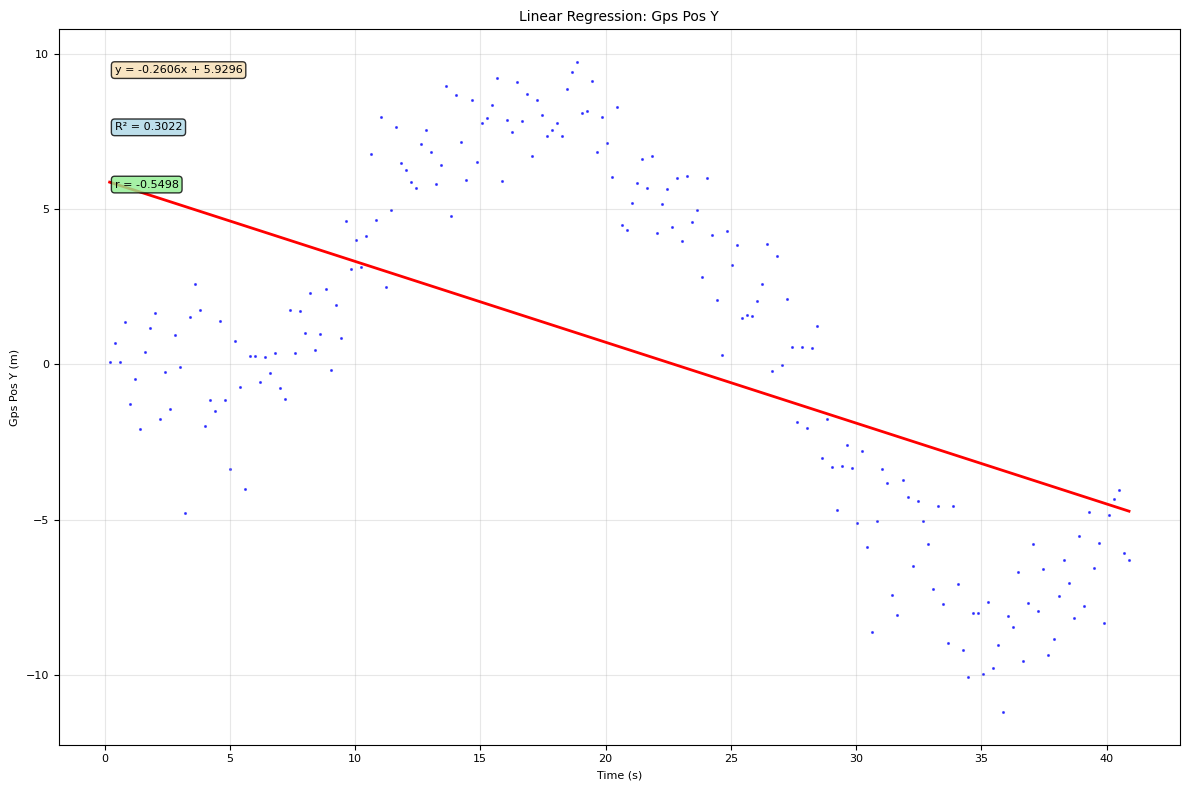

Plotting 9/25: gps_pos_z


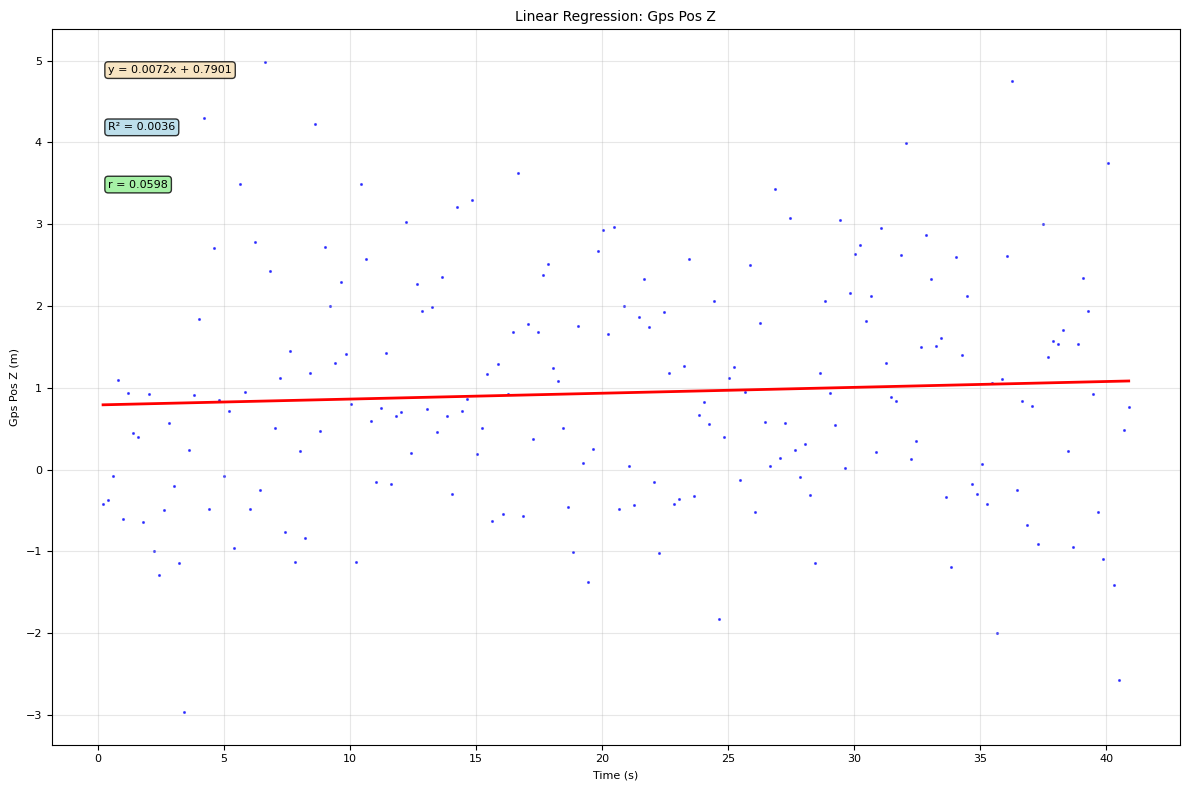

Plotting 10/25: gps_vel_x


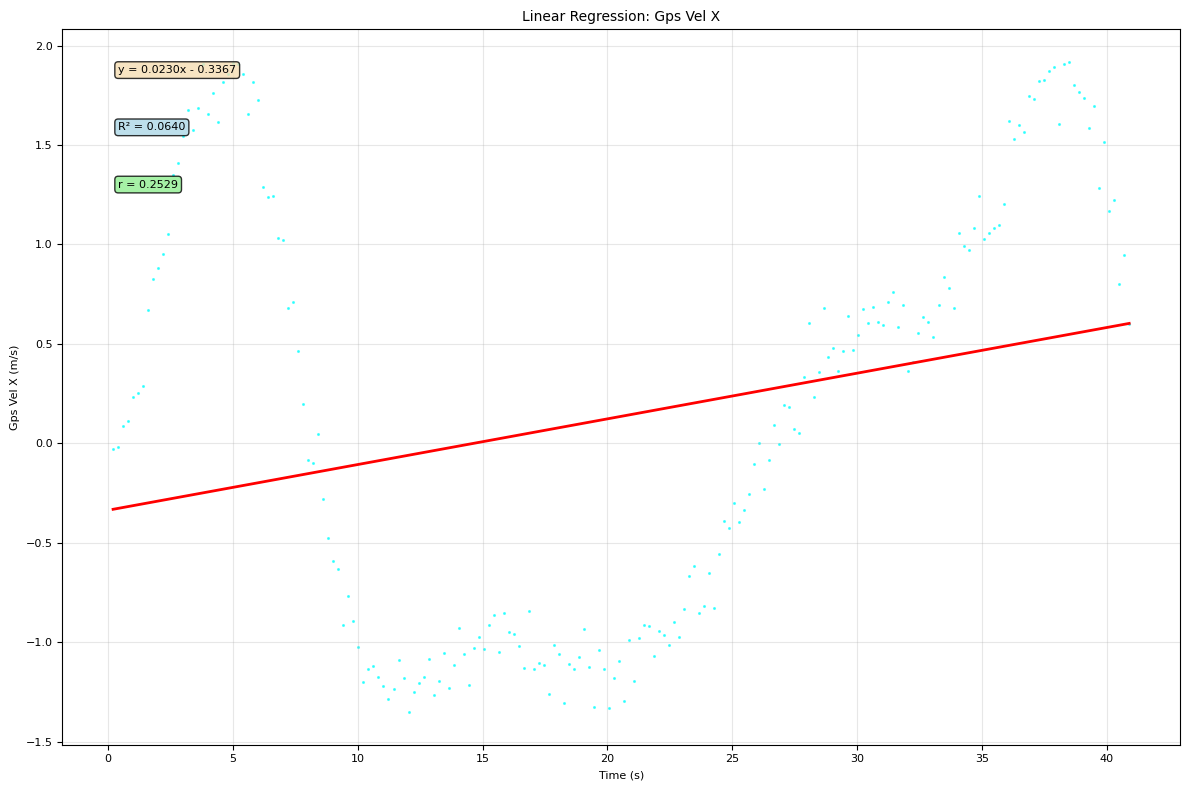

Plotting 11/25: gps_vel_y


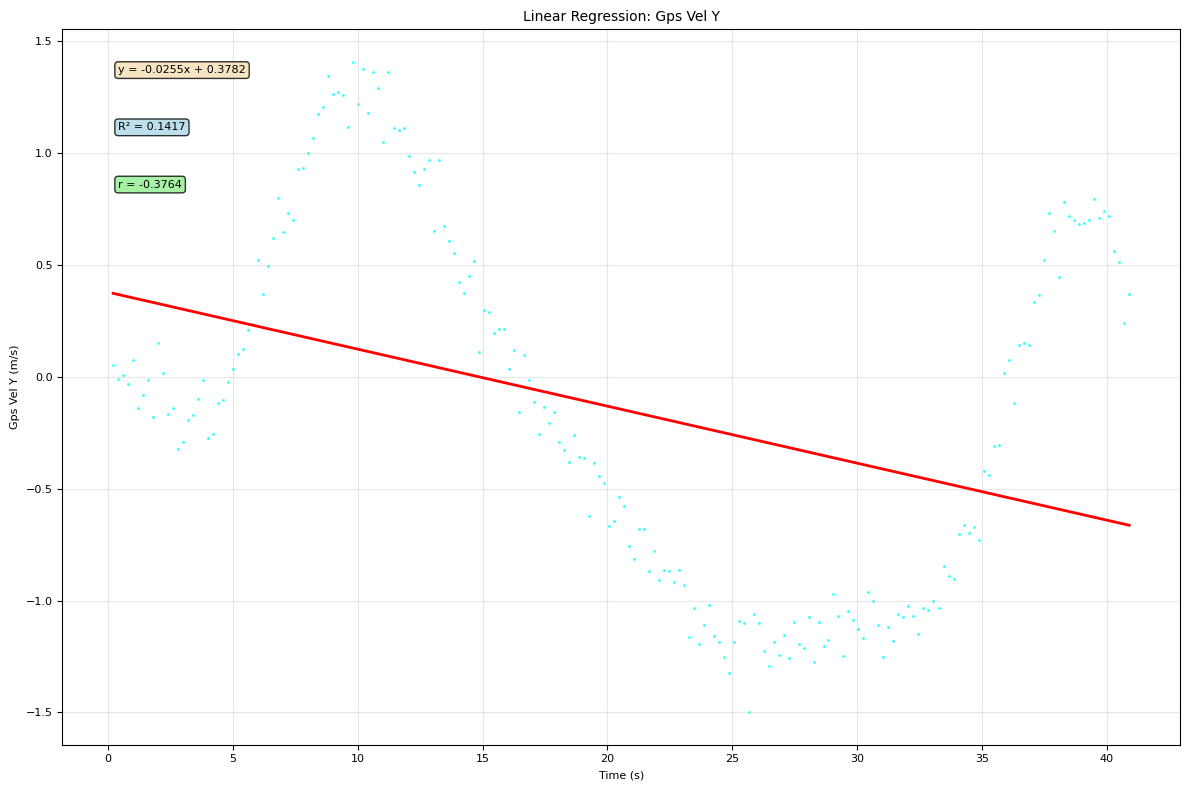

Plotting 12/25: gps_vel_z


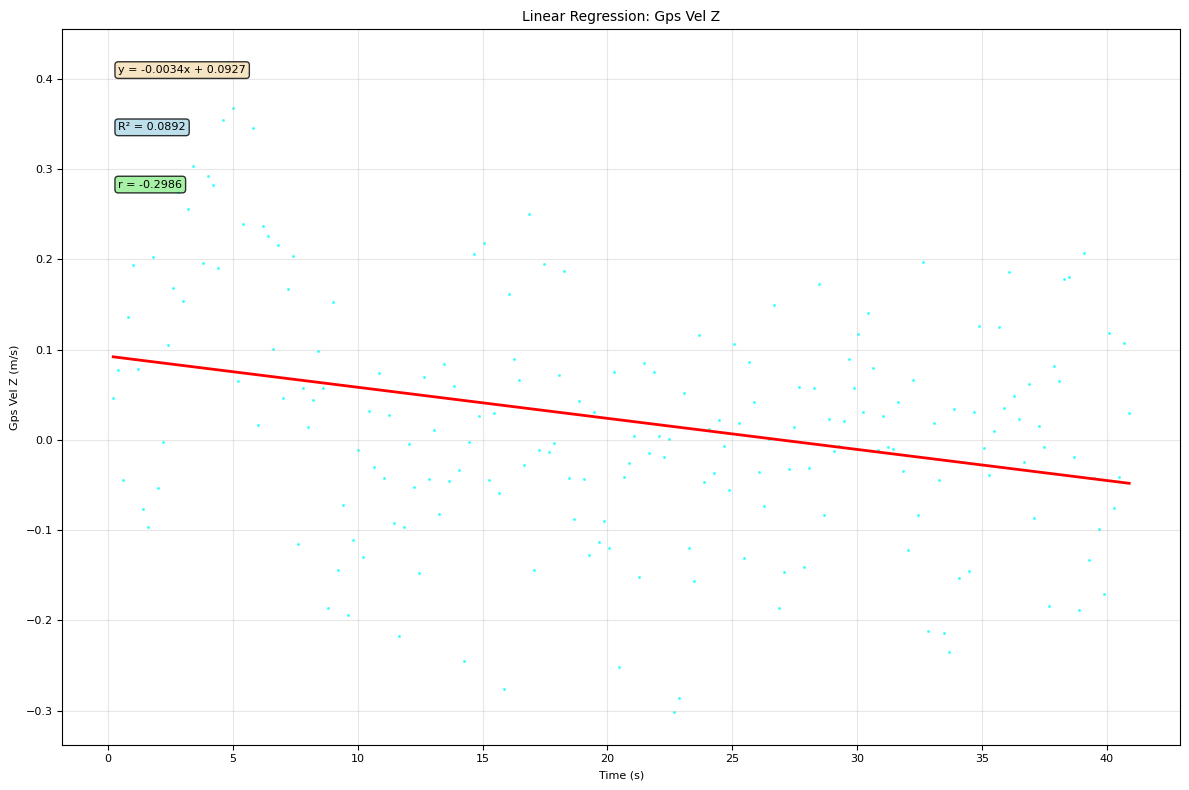

Plotting 13/25: baro_altitude


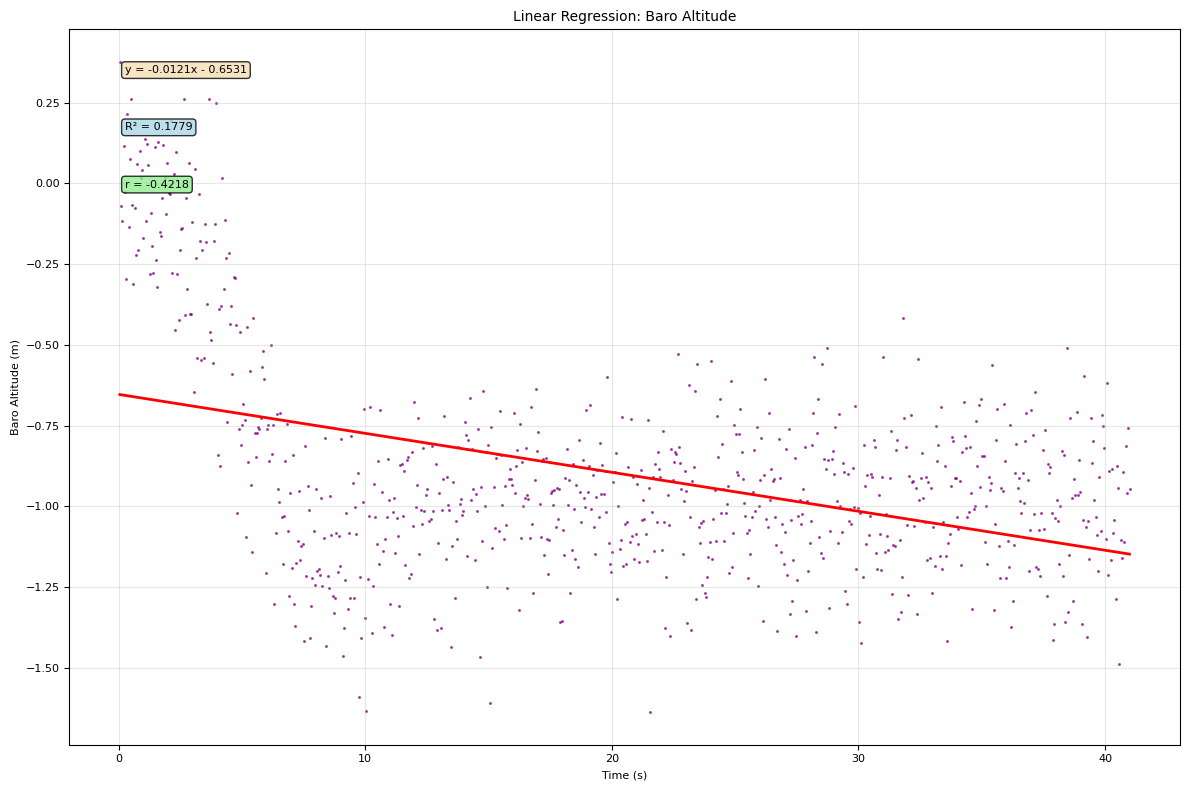

Plotting 14/25: mag_x


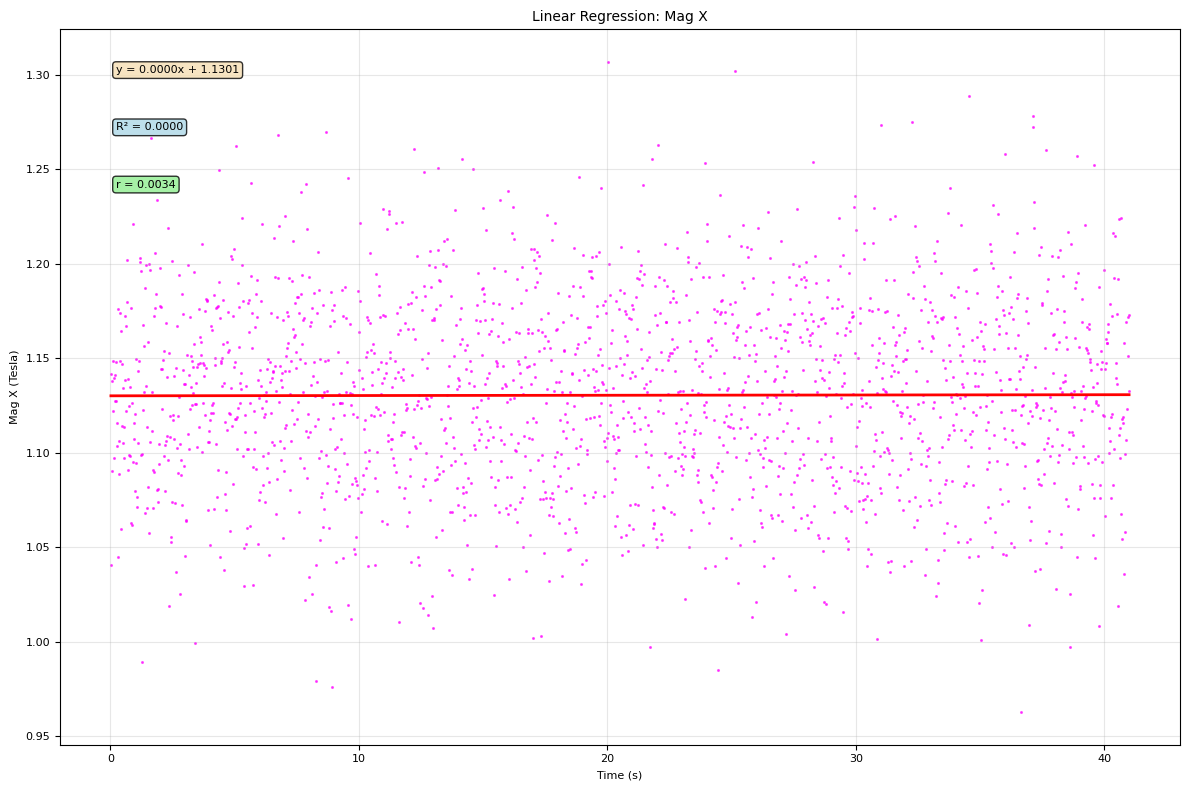

Plotting 15/25: mag_y


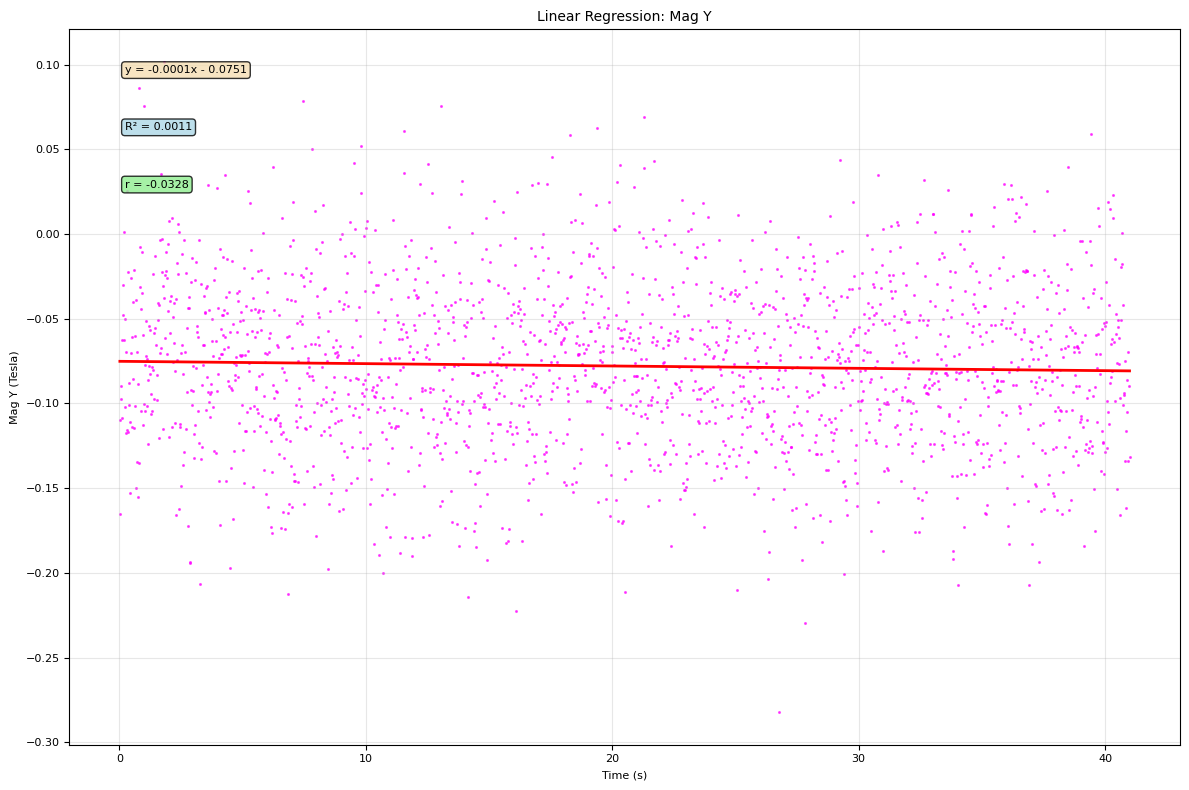

Plotting 16/25: mag_z


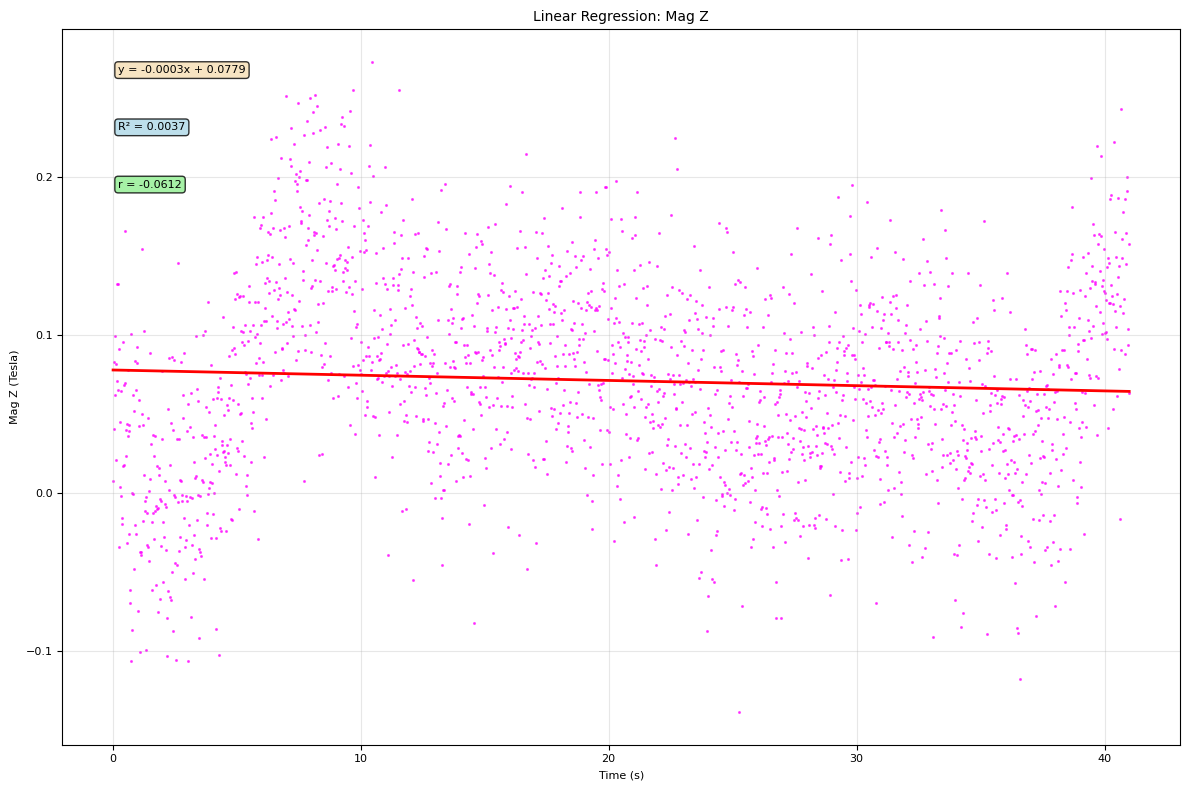

Plotting 17/25: true_pos_x


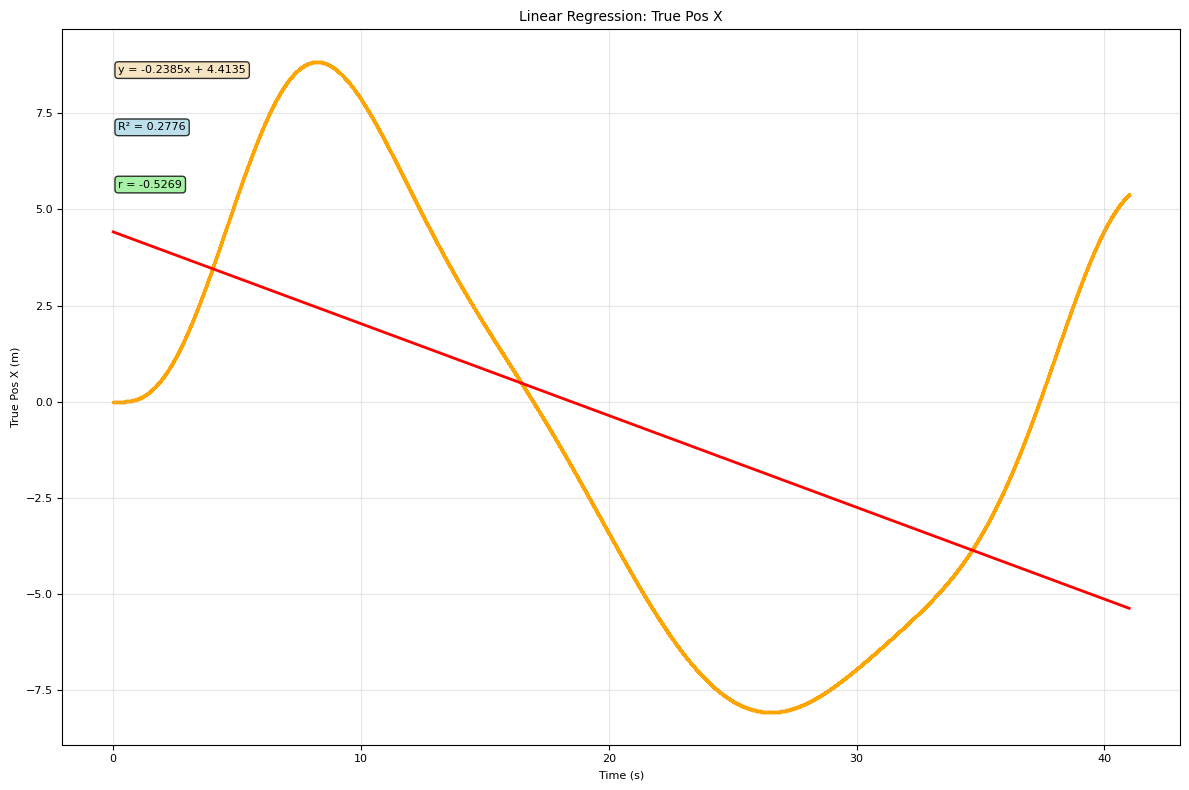

Plotting 18/25: true_pos_y


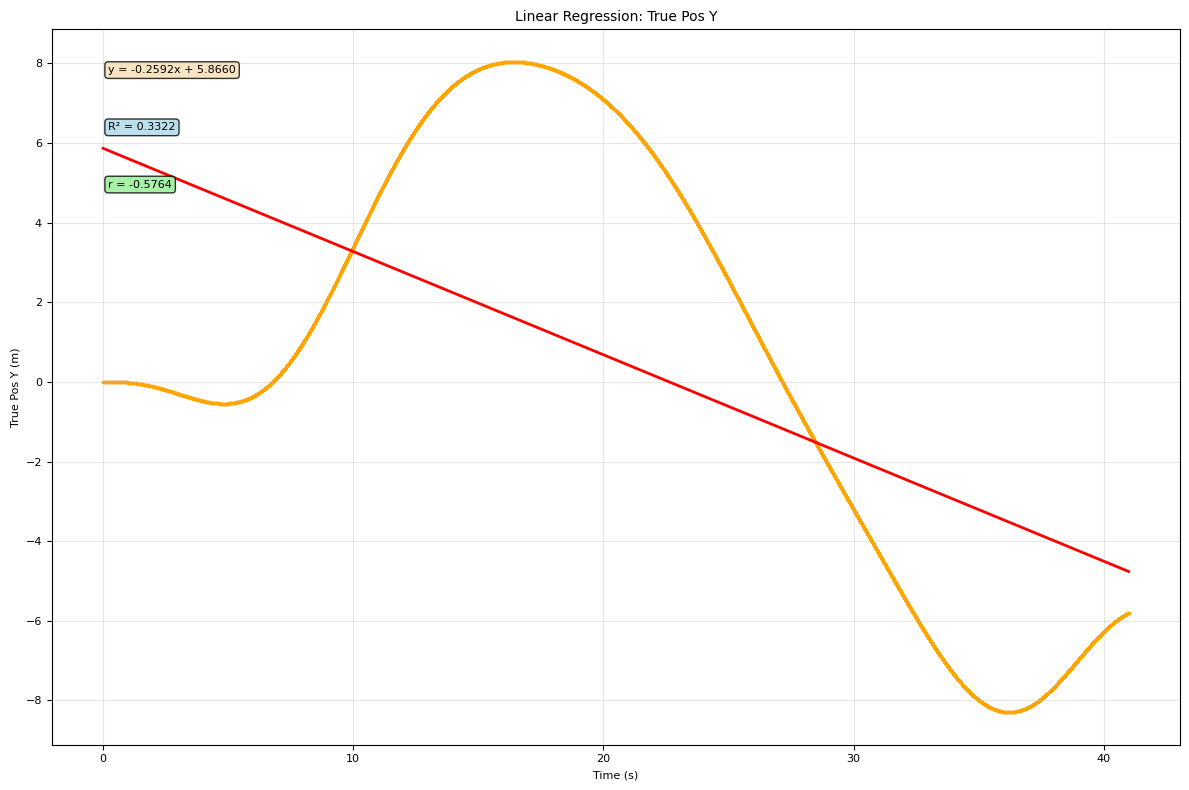

Plotting 19/25: true_pos_z


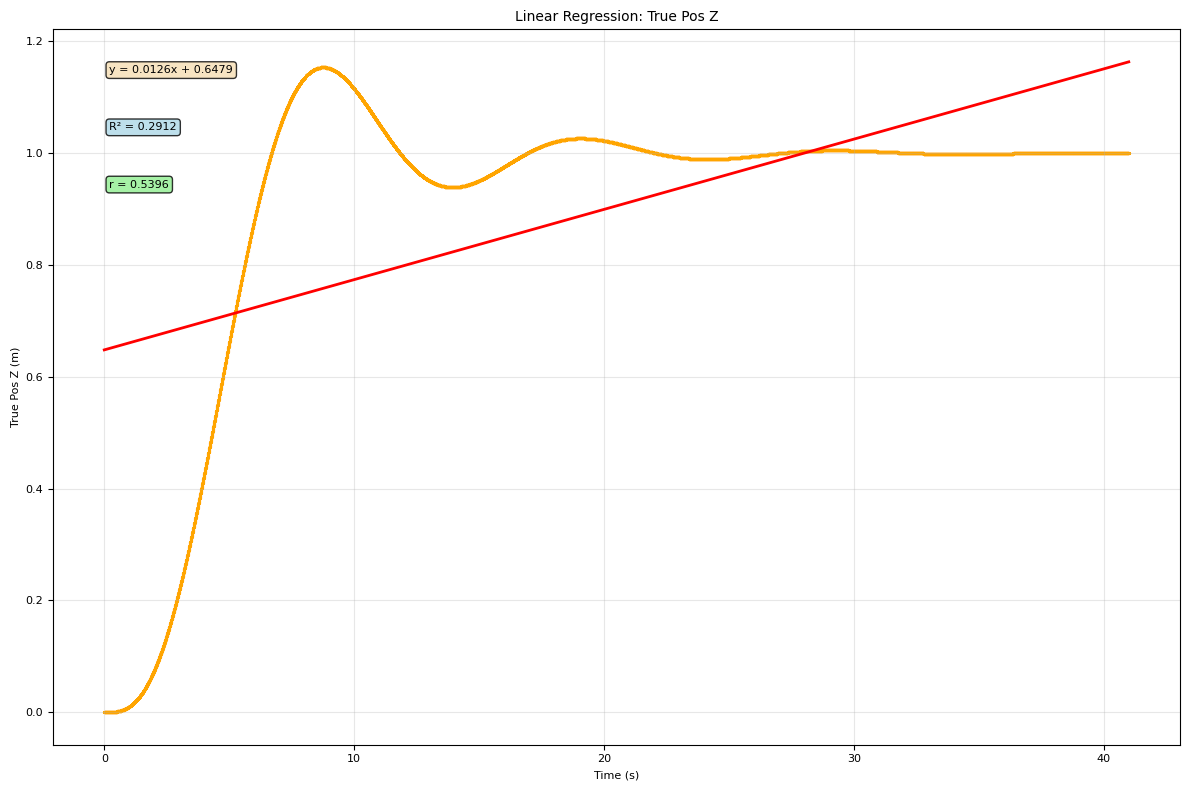

Plotting 20/25: true_vel_x


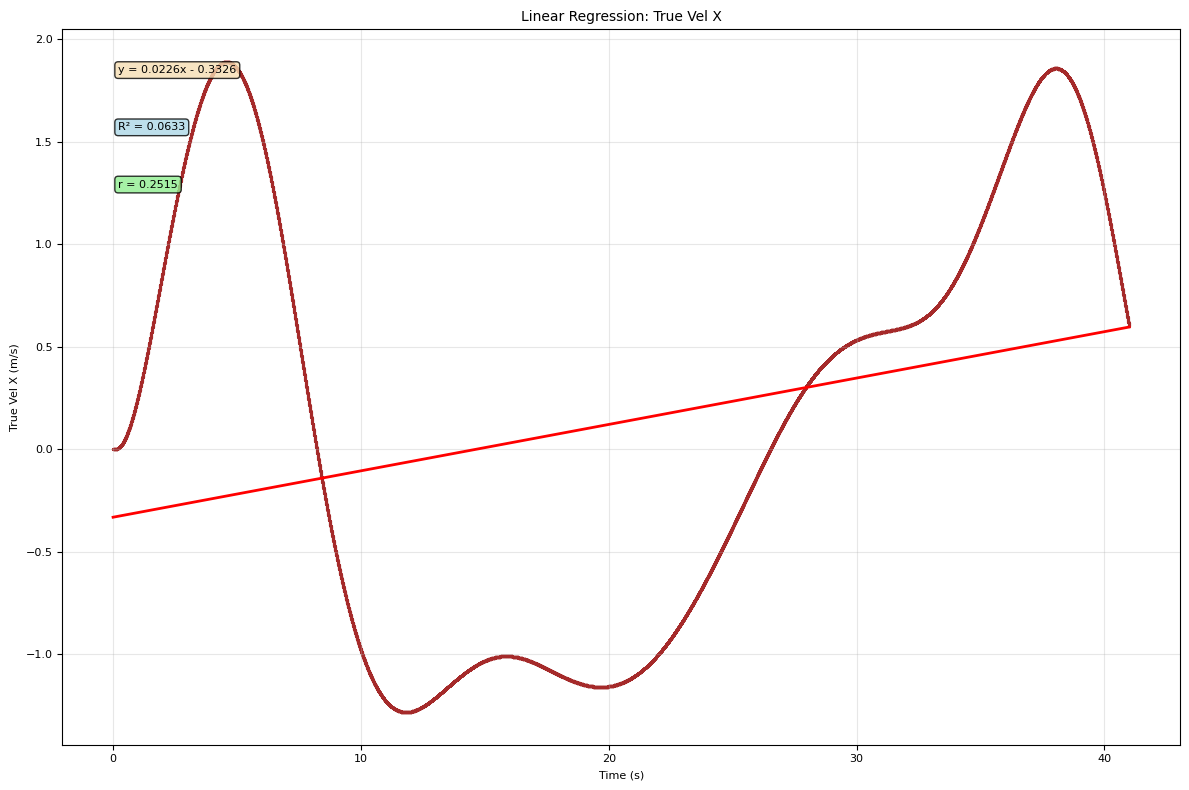

Plotting 21/25: true_vel_y


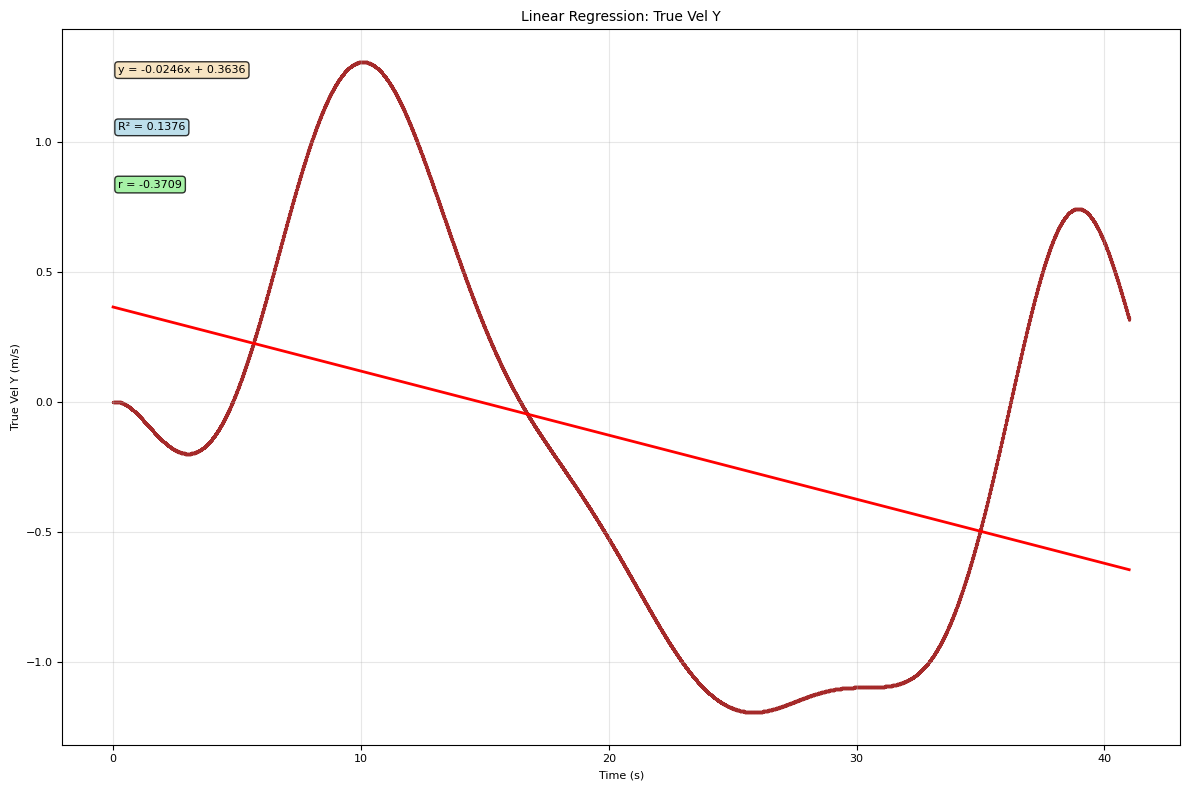

Plotting 22/25: true_vel_z


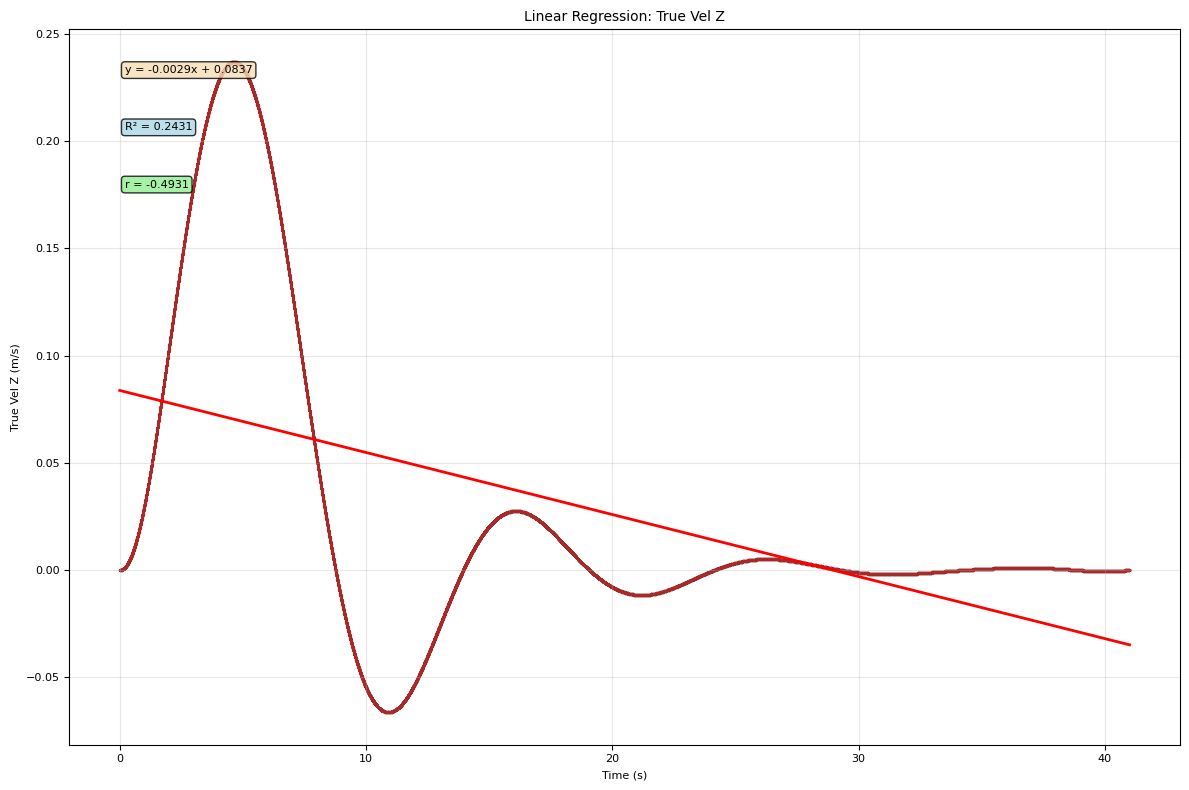

Plotting 23/25: true_roll


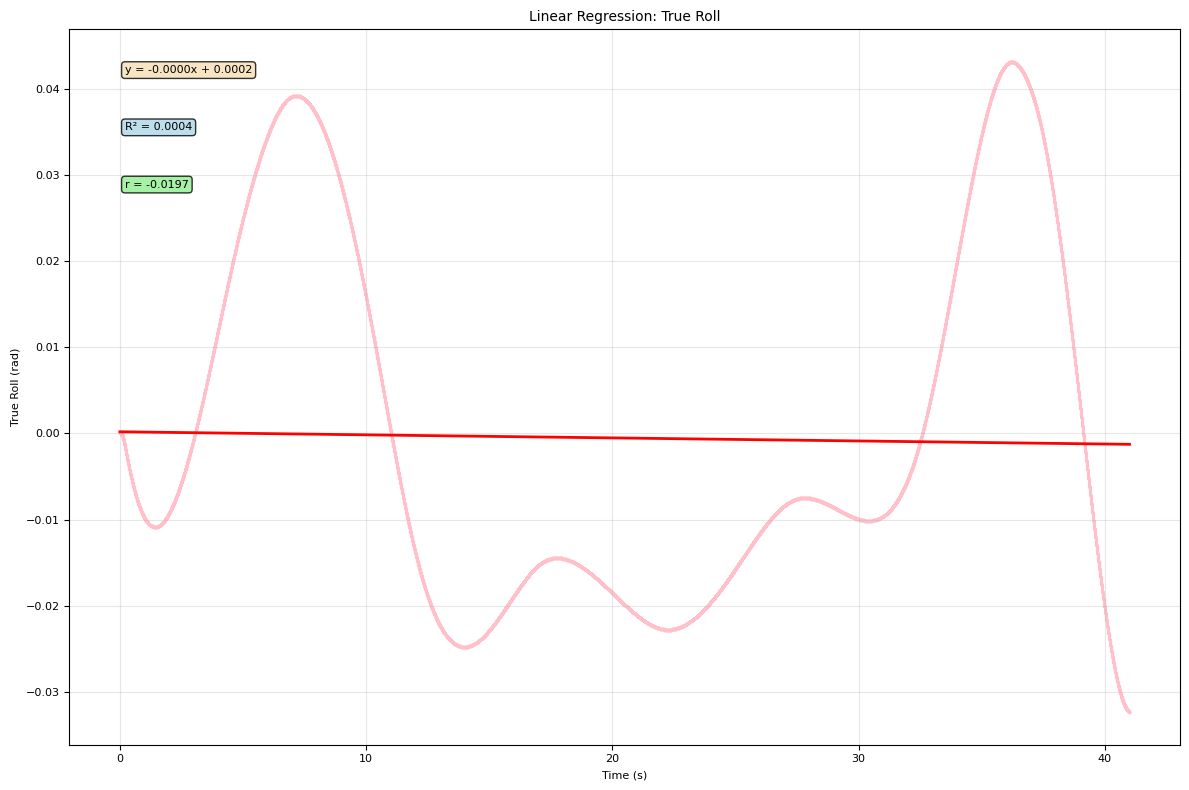

Plotting 24/25: true_pitch


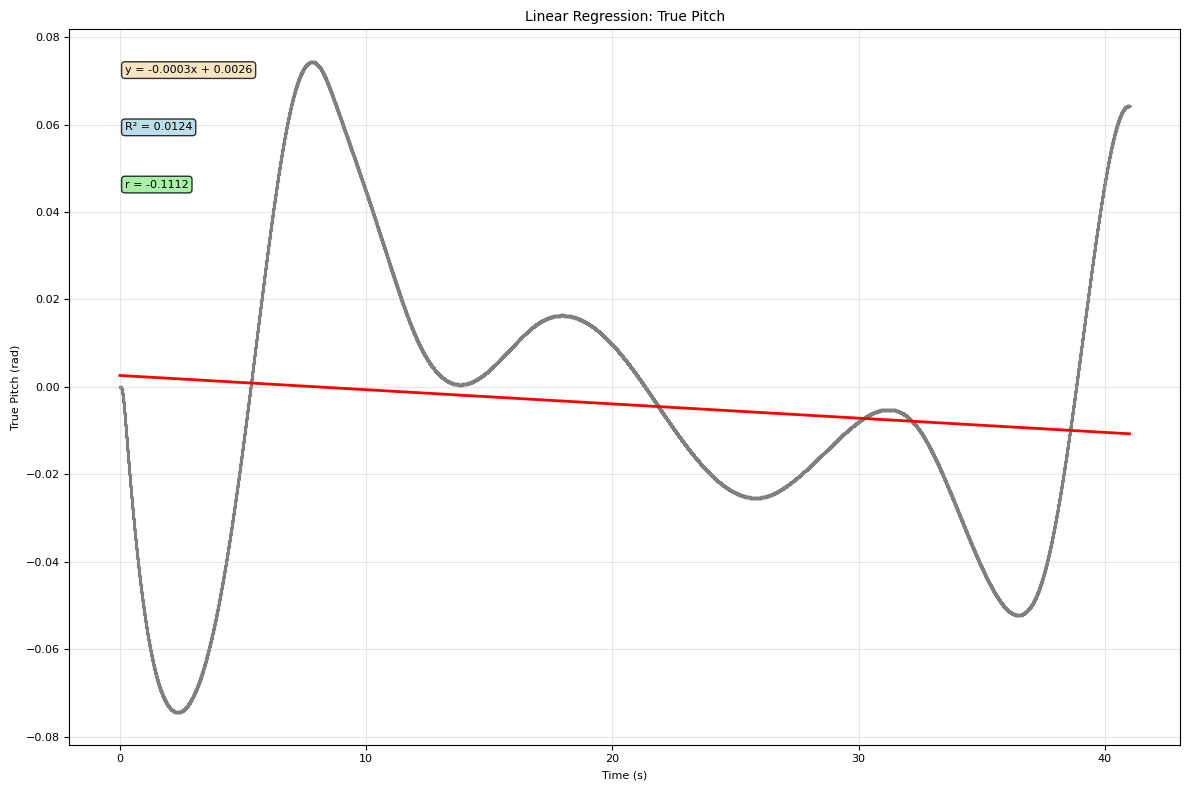

Plotting 25/25: true_yaw


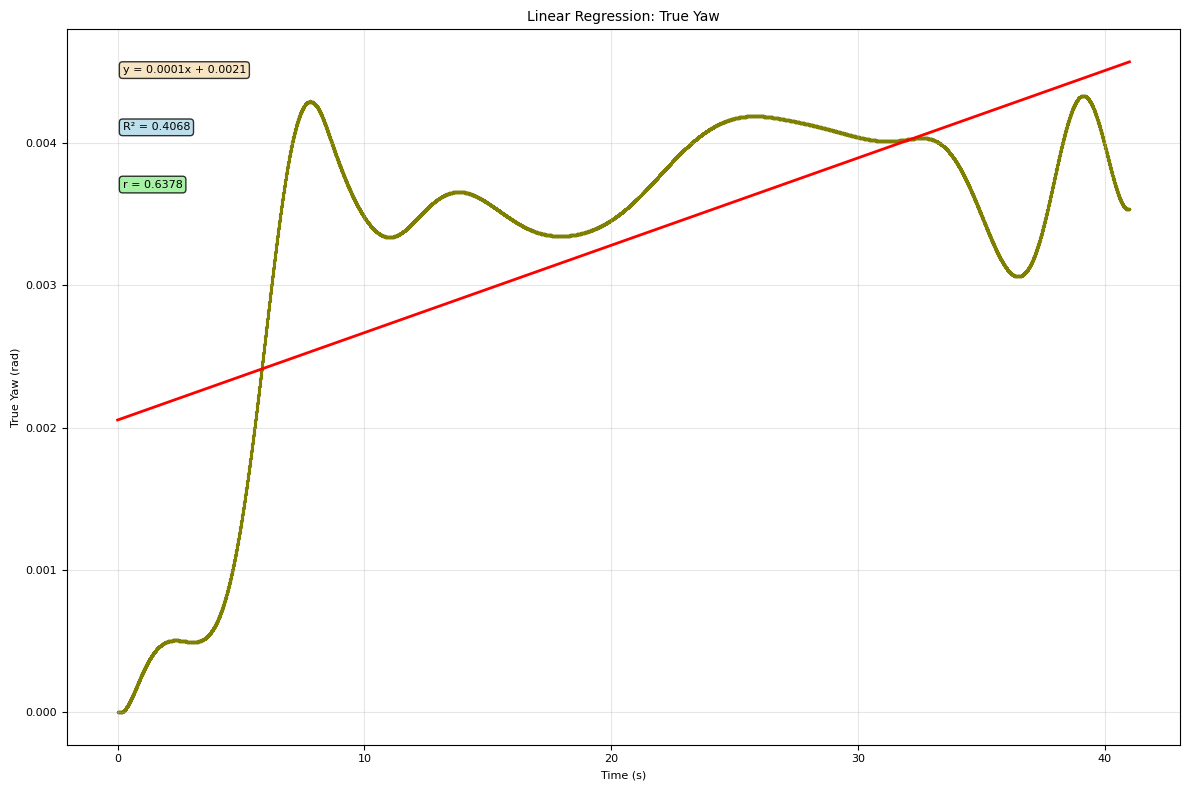


📊 Summary Statistics:
------------------------------------------------------------
acc_x          : Mean=  0.0751, Std=  0.1329, Min= -0.3651, Max=  0.4074
acc_y          : Mean= -0.0386, Std=  0.0856, Min= -0.3596, Max=  0.2431
acc_z          : Mean= -9.7855, Std=  0.0771, Min=-10.0590, Max=  0.0000
gyro_x         : Mean=  0.0074, Std=  0.0137, Min= -0.0489, Max=  0.0563
gyro_y         : Mean= -0.0094, Std=  0.0214, Min= -0.1066, Max=  0.0671
gyro_z         : Mean=  0.0043, Std=  0.0100, Min= -0.0402, Max=  0.0495
gps_pos_x      : Mean= -0.0030, Std=  0.3946, Min=-12.5642, Max= 11.4128
gps_pos_y      : Mean=  0.0029, Std=  0.3967, Min=-11.2100, Max=  9.7561
gps_pos_z      : Mean=  0.0047, Std=  0.1195, Min= -2.9661, Max=  4.9840
gps_vel_x      : Mean=  0.0007, Std=  0.0762, Min= -1.3525, Max=  1.9181
gps_vel_y      : Mean= -0.0007, Std=  0.0572, Min= -1.4989, Max=  1.4076
gps_vel_z      : Mean=  0.0001, Std=  0.0097, Min= -0.3016, Max=  0.4188
baro_altitude  : Mean= -0.0178, Std=  0.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import glob

def find_csv_files(data_path):
    """Find all CSV files in the specified directory"""
    csv_files = glob.glob(os.path.join(data_path, "*.csv"))
    return csv_files

def display_available_files(csv_files):
    """Display available CSV files with index numbers"""
    print("\n📁 Available CSV Files:")
    print("-" * 50)
    for i, file in enumerate(csv_files):
        file_size = os.path.getsize(file) / 1024  # KB
        print(f"{i+1:2d}. {os.path.basename(file):30s} ({file_size:.1f} KB)")
    print("-" * 50)

def display_sensor_options():
    """Display available sensor data options"""
    sensor_groups = {
        'acc': ['acc_x', 'acc_y', 'acc_z'],
        'gyro': ['gyro_x', 'gyro_y', 'gyro_z'],
        'gps_pos': ['gps_pos_x', 'gps_pos_y', 'gps_pos_z'],
        'gps_vel': ['gps_vel_x', 'gps_vel_y', 'gps_vel_z'],
        'mag': ['mag_x', 'mag_y', 'mag_z'],
        'baro': ['baro_altitude'],
        'true_pos': ['true_pos_x', 'true_pos_y', 'true_pos_z'],
        'true_vel': ['true_vel_x', 'true_vel_y', 'true_vel_z'],
        'true_att': ['true_roll', 'true_pitch', 'true_yaw']
    }
    
    print("\n📊 Available Sensor Groups:")
    print("-" * 60)
    for key, sensors in sensor_groups.items():
        sensor_list = ', '.join(sensors)
        print(f"{key:10s}: {sensor_list}")
    print("-" * 60)
    print("\n💡 Input Options:")
    print("• Group names: acc, gyro, gps_pos, gps_vel, mag, baro, true_pos, true_vel, true_att")
    print("• Individual sensors: acc_x, gyro_z, true_pos_x, etc.")
    print("• Multiple selections: separate with commas (e.g., 'acc, gyro, true_pos')")
    print("• All sensors: type 'all'")
    
    return sensor_groups

def parse_sensor_input(input_str, sensor_groups, available_columns):
    """Parse user input and return list of sensor columns to plot"""
    input_str = input_str.lower().strip()
    selected_sensors = []
    
    if input_str == 'all':
        # Return all available sensor columns (excluding timestamp and availability flags)
        exclude_cols = ['timestamp', 'gps_available', 'baro_available', 'mag_available']
        selected_sensors = [col for col in available_columns if col not in exclude_cols]
    else:
        # Parse comma-separated input
        inputs = [item.strip() for item in input_str.split(',')]
        
        for item in inputs:
            if item in sensor_groups:
                # It's a group name
                group_sensors = [s for s in sensor_groups[item] if s in available_columns]
                selected_sensors.extend(group_sensors)
            elif item in available_columns:
                # It's an individual sensor
                selected_sensors.append(item)
            else:
                print(f"⚠️  Warning: '{item}' not found in available data")
    
    # Remove duplicates while preserving order
    selected_sensors = list(dict.fromkeys(selected_sensors))
    return selected_sensors

def plot_regression(x, y, ax, title, xlabel, ylabel, color='blue'):
    """Create regression plot for given data"""
    # Remove NaN values
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        ax.text(0.5, 0.5, 'Insufficient data\n(<2 points)', 
               transform=ax.transAxes, ha='center', va='center', 
               fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
        ax.set_title(title, fontsize=10)
        ax.set_xlabel(xlabel, fontsize=8)
        ax.set_ylabel(ylabel, fontsize=8)
        return
    
    # Reshape for sklearn
    X = x_clean.reshape(-1, 1)
    
    # Fit linear regression
    reg = LinearRegression()
    reg.fit(X, y_clean)
    y_pred = reg.predict(X)
    
    # Calculate statistics
    r2 = r2_score(y_clean, y_pred)
    correlation = np.corrcoef(x_clean, y_clean)[0, 1]
    slope = reg.coef_[0]
    intercept = reg.intercept_
    
    # Plot data points
    ax.scatter(x_clean, y_clean, alpha=0.6, color=color, s=1.5)
    
    # Plot regression line
    ax.plot(x_clean, y_pred, color='red', linewidth=2)
    
    # Add statistics text
    if intercept >= 0:
        equation = f'y = {slope:.4f}x + {intercept:.4f}'
    else:
        equation = f'y = {slope:.4f}x - {abs(intercept):.4f}'
    
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=8, 
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.text(0.05, 0.87, f'R² = {r2:.4f}', transform=ax.transAxes, fontsize=8, 
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    ax.text(0.05, 0.79, f'r = {correlation:.4f}', transform=ax.transAxes, fontsize=8, 
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

def get_sensor_unit(column_name):
    """Get appropriate unit for each sensor type"""
    units = {
        'acc_': 'm/s²', 'gyro_': 'rad/s', 'gps_pos_': 'm', 'gps_vel_': 'm/s',
        'mag_': 'Tesla', 'baro_altitude': 'm', 'true_pos_': 'm', 'true_vel_': 'm/s',
        'true_roll': 'rad', 'true_pitch': 'rad', 'true_yaw': 'rad'
    }
    
    for key, unit in units.items():
        if key in column_name:
            return unit
    return ''

def get_sensor_color(column_name):
    """Get color based on sensor type"""
    colors = {
        'acc': 'red', 'gyro': 'green', 'gps_pos': 'blue', 'gps_vel': 'cyan',
        'mag': 'magenta', 'baro': 'purple', 'true_pos': 'orange', 
        'true_vel': 'brown', 'true_roll': 'pink', 'true_pitch': 'gray', 'true_yaw': 'olive'
    }
    
    for sensor_type, color in colors.items():
        if sensor_type in column_name:
            return color
    return 'blue'

def main():
    """Main function to run the quadcopter data analysis"""
    print("="*80)
    print("🚁 QUADCOPTER SENSOR DATA LINEAR REGRESSION ANALYSIS")
    print("="*80)
    
    # Set default data path
    default_path = r"D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs"
    
    print(f"\n📂 Default data path: {default_path}")
    custom_path = input("Enter custom path (or press Enter to use default): ").strip()
    
    data_path = custom_path if custom_path else default_path
    
    # Find CSV files
    csv_files = find_csv_files(data_path)
    
    if not csv_files:
        print(f"❌ No CSV files found in: {data_path}")
        return
    
    # Display available files
    display_available_files(csv_files)
    
    # File selection
    while True:
        try:
            file_choice = input(f"\nSelect file number (1-{len(csv_files)}): ").strip()
            file_index = int(file_choice) - 1
            if 0 <= file_index < len(csv_files):
                selected_file = csv_files[file_index]
                break
            else:
                print(f"❌ Please enter a number between 1 and {len(csv_files)}")
        except ValueError:
            print("❌ Please enter a valid number")
    
    # Load data
    print(f"\n📖 Loading data from: {os.path.basename(selected_file)}")
    try:
        df = pd.read_csv(selected_file)
        print(f"✅ Data loaded successfully!")
        print(f"   Shape: {df.shape}")
        print(f"   Time range: {df['timestamp'].min():.2f} - {df['timestamp'].max():.2f} seconds")
        print(f"   Duration: {df['timestamp'].max() - df['timestamp'].min():.2f} seconds")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return
    
    # Display data summary
    print(f"\n📋 Data Summary:")
    print(f"   Total samples: {len(df):,}")
    
    # Check availability flags
    availability_flags = ['gps_available', 'baro_available', 'mag_available']
    for flag in availability_flags:
        if flag in df.columns:
            availability = df[flag].sum()
            percentage = (availability / len(df)) * 100
            sensor_name = flag.replace('_available', '').upper()
            print(f"   {sensor_name} availability: {availability:,}/{len(df):,} ({percentage:.1f}%)")
    
    # Display sensor options
    sensor_groups = display_sensor_options()
    
    # Sensor selection
    print(f"\n📊 Available columns in data: {list(df.columns)}")
    sensor_input = input("\nEnter sensors to plot: ").strip()
    
    if not sensor_input:
        print("❌ No sensors selected")
        return
    
    # Parse sensor selection
    selected_sensors = parse_sensor_input(sensor_input, sensor_groups, df.columns)
    
    if not selected_sensors:
        print("❌ No valid sensors found")
        return
    
    print(f"\n✅ Selected sensors ({len(selected_sensors)}): {selected_sensors}")
    
    # Ask for plot layout
    print(f"\n🎨 Plot Layout Options:")
    print("1. Subplots (all in one figure)")
    print("2. Separate figures")
    
    layout_choice = input("Choose layout (1 or 2, default=1): ").strip()
    separate_plots = layout_choice == '2'
    
    # Plot the selected sensors
    print(f"\n📈 Generating plots...")
    
    if separate_plots:
        # Create separate figures for each sensor
        for i, sensor in enumerate(selected_sensors):
            print(f"Plotting {i+1}/{len(selected_sensors)}: {sensor}")
            
            fig, ax = plt.subplots(1, 1, figsize=(12, 8))
            
            # Handle sensor availability
            if 'gps' in sensor and 'gps_available' in df.columns:
                mask = df['gps_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'mag' in sensor and 'mag_available' in df.columns:
                mask = df['mag_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'baro' in sensor and 'baro_available' in df.columns:
                mask = df['baro_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            else:
                x_data = df['timestamp']
                y_data = df[sensor]
            
            color = get_sensor_color(sensor)
            unit = get_sensor_unit(sensor)
            ylabel = f"{sensor.replace('_', ' ').title()} ({unit})" if unit else sensor.replace('_', ' ').title()
            
            plot_regression(x_data.values, y_data.values, ax, 
                          f'Linear Regression: {sensor.replace("_", " ").title()}', 
                          'Time (s)', ylabel, color)
            
            plt.tight_layout()
            plt.show()
    
    else:
        # Create subplots
        n_sensors = len(selected_sensors)
        n_cols = min(3, n_sensors)
        n_rows = (n_sensors + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        fig.suptitle('Quadcopter Sensor Data - Linear Regression Analysis', 
                    fontsize=16, fontweight='bold')
        
        # Handle single plot case
        if n_sensors == 1:
            axes = [axes]
        elif n_rows == 1 or n_cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()
        
        for i, sensor in enumerate(selected_sensors):
            # Handle sensor availability
            if 'gps' in sensor and 'gps_available' in df.columns:
                mask = df['gps_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'mag' in sensor and 'mag_available' in df.columns:
                mask = df['mag_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'baro' in sensor and 'baro_available' in df.columns:
                mask = df['baro_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            else:
                x_data = df['timestamp']
                y_data = df[sensor]
            
            color = get_sensor_color(sensor)
            unit = get_sensor_unit(sensor)
            ylabel = f"{sensor.split('_')[-1].upper()} ({unit})" if unit else sensor.split('_')[-1].upper()
            
            plot_regression(x_data.values, y_data.values, axes[i], 
                          sensor.replace('_', ' ').title(), 'Time (s)', ylabel, color)
        
        # Remove unused subplots
        for i in range(n_sensors, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    # Print summary statistics
    print(f"\n📊 Summary Statistics:")
    print("-" * 60)
    for sensor in selected_sensors:
        data = df[sensor].dropna()
        if len(data) > 0:
            print(f"{sensor:15s}: Mean={data.mean():8.4f}, Std={data.std():8.4f}, "
                  f"Min={data.min():8.4f}, Max={data.max():8.4f}")
    
    print(f"\n✅ Analysis complete! Generated plots for {len(selected_sensors)} sensors.")

# Run the main function
if __name__ == "__main__":
    main()